In [21]:
import pandas as pd
import numpy as np
import random
import math
import matplotlib.pyplot as plt

data = pd.read_csv("./WineDataset.csv")
data.describe()

,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Wine
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


### Проведите предварительную обработку данных, включая обработку отсутствующих значений, кодирование категориальных признаков и масштабирование.

In [22]:
if not data.isna().any().any():
    print("В данных нет пустых значений.")
else:
    data.dropna(inplace=True)
    print("Пустые значения был удалены.")

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = data.drop("Wine", axis=1)
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
y = data["Wine"]

В данных нет пустых значений.


### Получите и визуализируйте (графически) статистику по датасету (включая количество, среднее значение, стандартное отклонение, минимум, максимум и различные квантили), постройте 3d-визуализацию признаков.

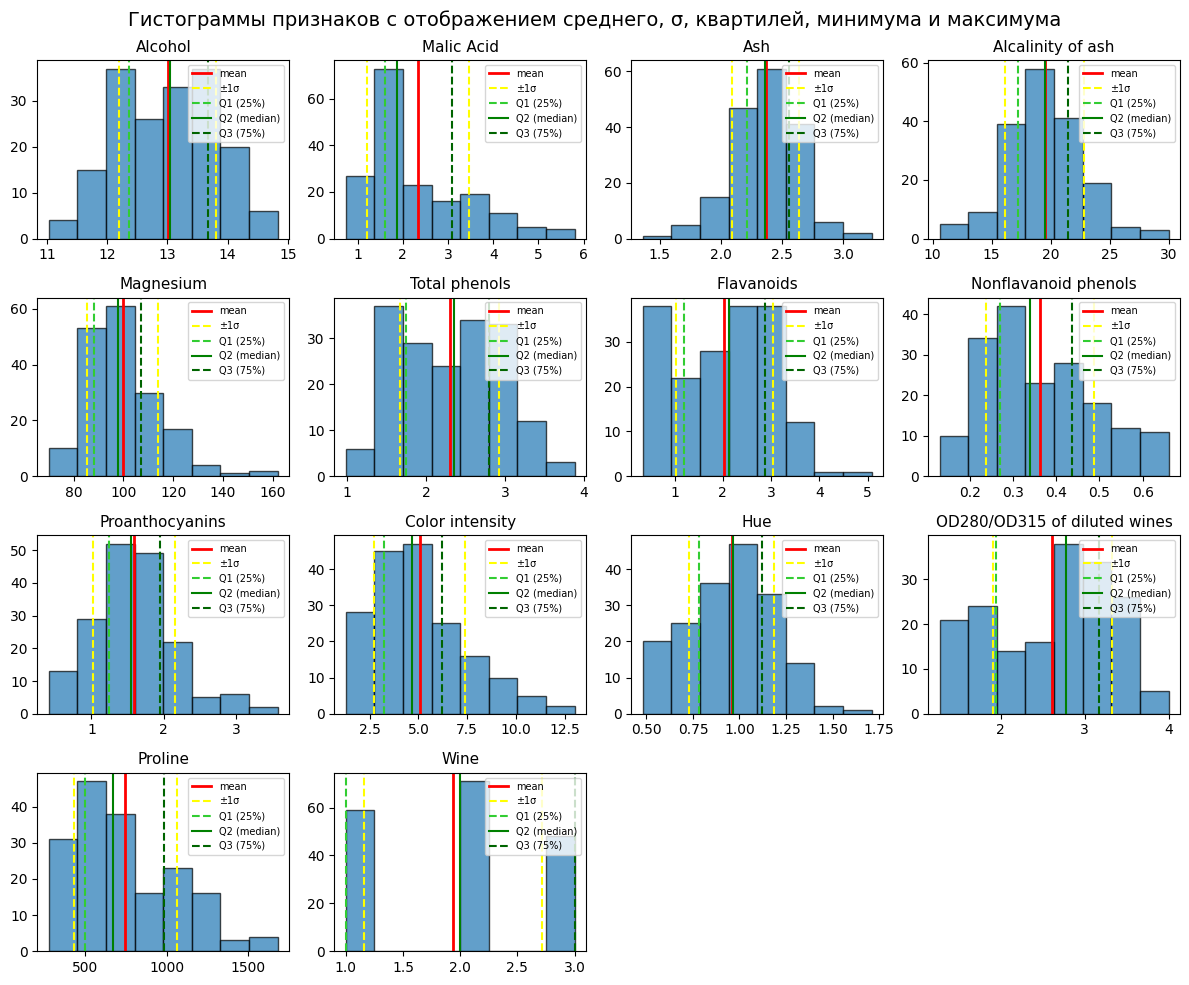

In [30]:
rows_count, cols_count = data.shape

means = data.mean()
corrected_dispersions = np.sum(np.power(data - means, 2), axis=0) / (rows_count - 1)
standart_offsets = np.sqrt(corrected_dispersions)
quantiles = data.quantile([0.25, 0.5, 0.75])

bins_count = 1 + int(math.log(rows_count, 2))

titles = data.columns
fig = plt.figure(figsize=(12, 10))

for i, column in enumerate(titles):
    ax = fig.add_subplot(math.ceil(cols_count / 4), 4, i + 1)
    hist = ax.hist(data[column], bins=bins_count, edgecolor="black", alpha=0.7)

    ax.axvline(means.iloc[i], color="red", linestyle='-', linewidth=2, label="mean")
    ax.axvline(means.iloc[i] - standart_offsets.iloc[i], color="yellow", linestyle='--', linewidth=1.5, label="±1σ")
    ax.axvline(means.iloc[i] + standart_offsets.iloc[i], color="yellow", linestyle='--', linewidth=1.5)

    ax.axvline(quantiles.iloc[0, i], color="limegreen", linestyle='--', linewidth=1.5, label="Q1 (25%)")
    ax.axvline(quantiles.iloc[1, i], color="green", linestyle='-', linewidth=1.5, label="Q2 (median)")
    ax.axvline(quantiles.iloc[2, i], color="darkgreen", linestyle='--', linewidth=1.5, label="Q3 (75%)")

    ax.set_title(titles[i], fontsize=11)
    ax.legend(fontsize=7, loc="upper right")

fig.suptitle("Гистограммы признаков с отображением среднего, σ, квартилей, минимума и максимума", fontsize=14)
fig.tight_layout()
plt.show()


Index(['Proline', 'Alcalinity of ash', 'Total phenols', 'Wine'], dtype='object')


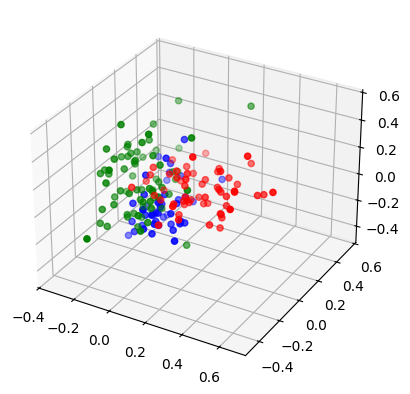

In [33]:
X = data.drop(columns=["Wine"])
y = data["Wine"]

X = (X - X.mean()) / (X.max() - X.min())

r_columns = list(X.columns)
random.shuffle(r_columns)
r_columns = r_columns[:3]

colors = {1: "red", 2: "green", 3: "blue"}
df = X[r_columns].join(y)
print(df.columns)
ax = plt.axes(projection="3d")

for i in list(set(y)):
    values = df.loc[df["Wine"] == i]
    ax.scatter(values[df.columns[0]], values[df.columns[1]], values[df.columns[2]], color=colors[i])

plt.show()

### Реализуйте метод k-ближайших соседей ****без использования сторонних библиотек, кроме NumPy и Pandas.

In [25]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))


def k_nearest_neighbors(X, y, query_point, k):
    distances = [euclidean_distance(query_point, x) for x in X]
    k_indices = np.argsort(distances)[:k]
    k_nearest_labels = [y[i] for i in k_indices]
    most_common = np.bincount(k_nearest_labels).argmax()
    return most_common


### Постройте две модели k-NN с различными наборами признаков:
- Модель 1: Признаки случайно отбираются.
- Модель 2: Фиксированный набор признаков, который выбирается заранее.

In [26]:
from sklearn.model_selection import train_test_split

np.random.seed(42)


def get_confusion_matrices(k_values, X_model, y):
    confusion_matrices_model = []
    X_train, X_test, y_train, y_test = train_test_split(X_model, y, test_size=0.2, random_state=42)
    for k in k_values:
        y_pred_model = [k_nearest_neighbors(X_train.values, y_train.values, x, k) for x in X_test.values]
        confusion_matrix = np.zeros((3, 3), dtype=int)
        for i in range(len(y_test)):
            confusion_matrix[y_test.iloc[i] - 1][y_pred_model[i] - 1] += 1
            confusion_matrices_model.append(confusion_matrix)

    return confusion_matrices_model

### Для каждой модели проведите оценку на тестовом наборе данных при разных значениях k. Выберите несколько различных значений k, например, k=3, k=5, k=10, и т. д. Постройте матрицу ошибок.

In [27]:
k_values = [3, 5, 10]

random_feature_indices = np.random.choice(X.shape[1], size=3, replace=False)
X_model1 = X.iloc[:, random_feature_indices]

fixed_feature_indices = [0, 1, 5]
X_model2 = X.iloc[:, fixed_feature_indices]

confusion_matrices_model1 = get_confusion_matrices(k_values, X_model1, y)
confusion_matrices_model2 = get_confusion_matrices(k_values, X_model2, y)

for k, confusion_matrix in zip(k_values, confusion_matrices_model1):
    print(f"Матрицы ошибок для Модели 1 с k={k}:\n", confusion_matrix)

print("\n---------------------------------\n")

for k, confusion_matrix in zip(k_values, confusion_matrices_model2):
    print(f"Матрицы ошибок для Модели 2 с k={k}:\n", confusion_matrix)

Матрицы ошибок для Модели 1 с k=3:
 [[14  0  0]
 [ 2 12  0]
 [ 2  1  5]]
Матрицы ошибок для Модели 1 с k=5:
 [[14  0  0]
 [ 2 12  0]
 [ 2  1  5]]
Матрицы ошибок для Модели 1 с k=10:
 [[14  0  0]
 [ 2 12  0]
 [ 2  1  5]]

---------------------------------

Матрицы ошибок для Модели 2 с k=3:
 [[14  0  0]
 [ 1 11  2]
 [ 0  0  8]]
Матрицы ошибок для Модели 2 с k=5:
 [[14  0  0]
 [ 1 11  2]
 [ 0  0  8]]
Матрицы ошибок для Модели 2 с k=10:
 [[14  0  0]
 [ 1 11  2]
 [ 0  0  8]]
